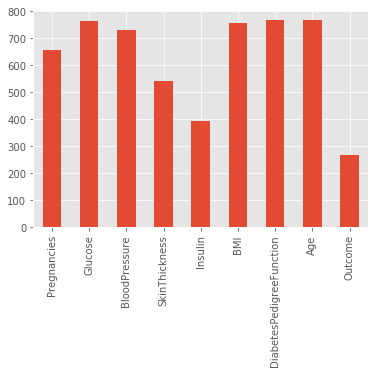

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

#Read in data and provide some visualisations for each feature/variable
df = pd.read_csv("pima_diabetes.csv")

#Describe the data out
df.describe()

b = df.astype(bool).sum(axis=0)

b.plot(kind='bar')
plt.show()




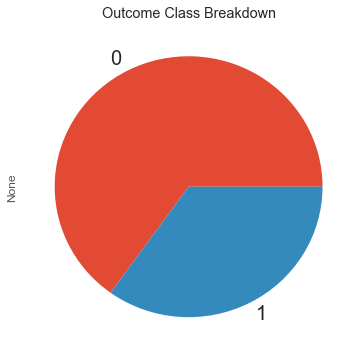

In [3]:
d = df.groupby('Outcome').size()

d.plot.pie(figsize = (6,6),title ='Outcome Class Breakdown', fontsize = 20)

plt.show()

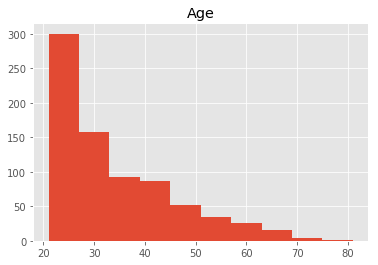

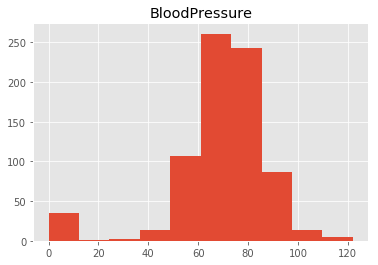

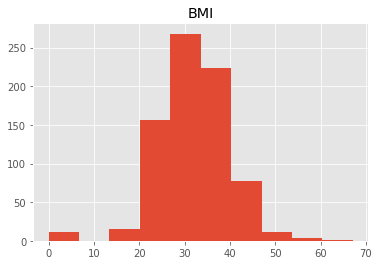

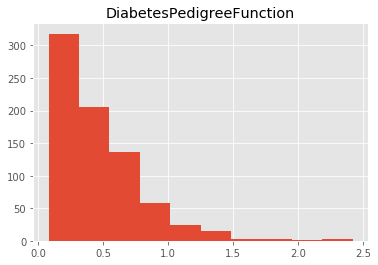

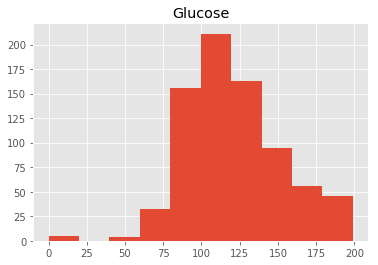

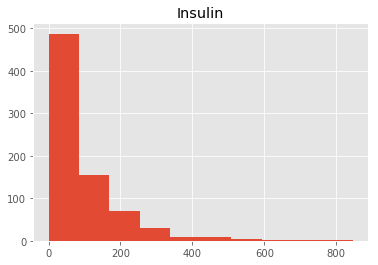

In [3]:
#Show shape/data for columns of interest

pd.DataFrame.hist(data=df, column= 'Age')
pd.DataFrame.hist(data=df, column= 'BloodPressure')
pd.DataFrame.hist(data=df, column= 'BMI')
pd.DataFrame.hist(data=df, column= 'DiabetesPedigreeFunction')
pd.DataFrame.hist(data=df, column= 'Glucose')
pd.DataFrame.hist(data=df, column= 'Insulin')

plt.show()

In [5]:
#Dealing with missing data

#df.head(20)

#Set BP to NaN where 0
dfclean1 = df.replace({'BloodPressure': {0: np.nan}}) 

#Impute with what is the previous value
dfclean1.fillna(method = 'bfill', inplace=True)

#Set BMI to NaN where 0
dfclean2 = dfclean1.replace({'BMI': {0: np.nan}}) 

#Impute with what is the previous value
dfclean2.fillna(dfclean2[['BMI']].mean(), inplace=True)

#Set GTT to NaN where 0
dfclean = dfclean2.replace({'Glucose': {0: np.nan}}) 

#Impute with what is the previous value
dfclean.fillna(dfclean[['Glucose']].mean(), inplace=True)

#Remove columns of no interest
del dfclean['SkinThickness']
del dfclean['Insulin']


dfclean.describe()



,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.352865,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.318850,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


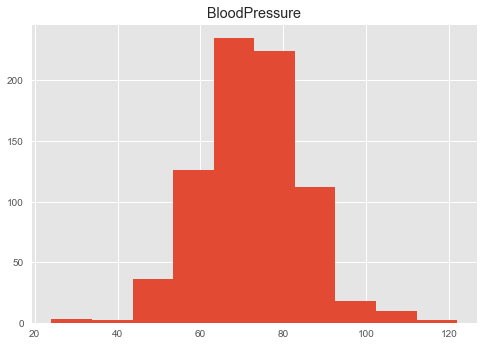

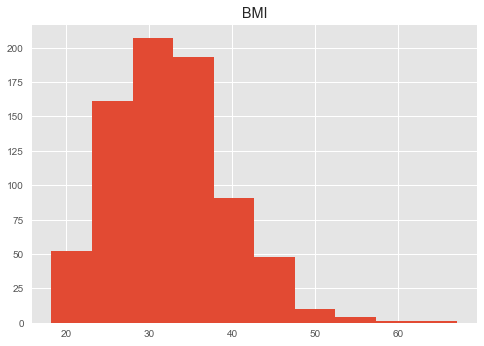

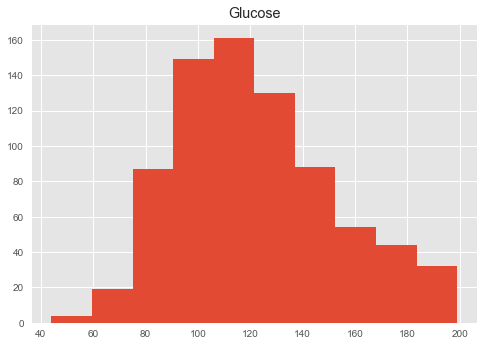

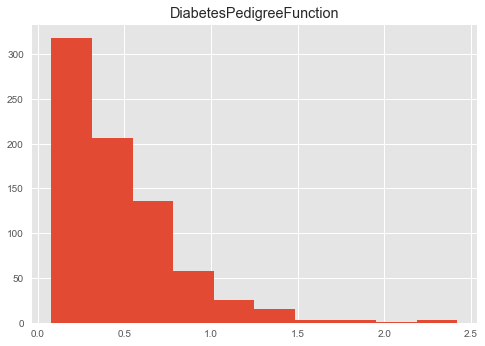

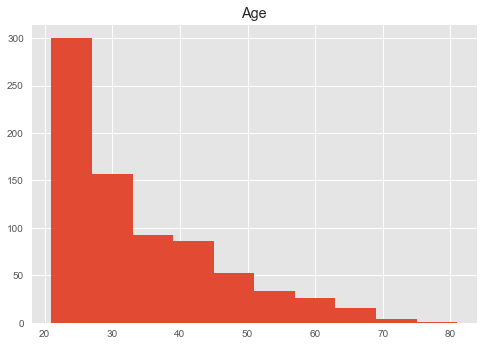

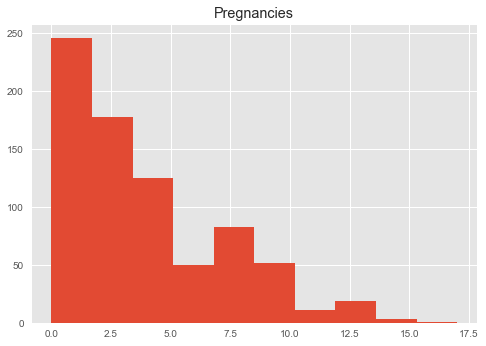

In [6]:
#Display columns of interest (figures )

pd.DataFrame.hist(data=dfclean, column= 'BloodPressure')
pd.DataFrame.hist(data=dfclean, column= 'BMI')
pd.DataFrame.hist(data=dfclean, column= 'Glucose')
pd.DataFrame.hist(data=dfclean, column= 'DiabetesPedigreeFunction')
pd.DataFrame.hist(data=dfclean, column= 'Age')
pd.DataFrame.hist(data=dfclean, column= 'Pregnancies')

plt.show()

In [7]:
for column in dfclean.columns:
    print('{0} {1}'.format(str(type(dfclean[column][0])),str(column)))

<class 'numpy.int64'> Pregnancies
<class 'numpy.float64'> Glucose
<class 'numpy.float64'> BloodPressure
<class 'numpy.float64'> BMI
<class 'numpy.float64'> DiabetesPedigreeFunction
<class 'numpy.int64'> Age
<class 'numpy.int64'> Outcome


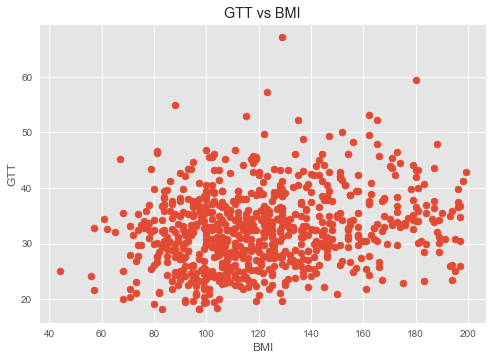

In [8]:

#Scatter plot of BMI vs Glucose, not used
BMI = dfclean[['BMI']]
GTT = dfclean[['Glucose']]


plt.scatter(GTT, BMI)
plt.title('GTT vs BMI')
plt.xlabel('BMI')
plt.ylabel('GTT')
#plt.axis([-1,35,-1,35])
plt.show()

                          Pregnancies   Glucose  BloodPressure       BMI  \
Pregnancies                  1.000000  0.127911       0.194204  0.021565   
Glucose                      0.127911  1.000000       0.211025  0.230941   
BloodPressure                0.194204  0.211025       1.000000  0.275078   
BMI                          0.021565  0.230941       0.275078  1.000000   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.012005  0.153400   
Age                          0.544341  0.266534       0.309616  0.025519   
Outcome                      0.221898  0.492928       0.164303  0.311924   

                          DiabetesPedigreeFunction       Age   Outcome  
Pregnancies                              -0.033523  0.544341  0.221898  
Glucose                                   0.137060  0.266534  0.492928  
BloodPressure                            -0.012005  0.309616  0.164303  
BMI                                       0.153400  0.025519  0.311924  
DiabetesPedigreeFunction  

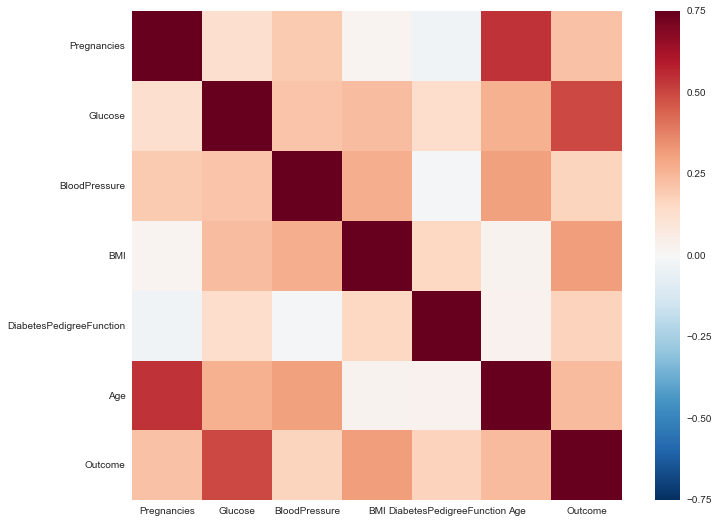

In [6]:
#Correlation matrix - As per figure 1 in Project document
import seaborn as sns

corrmat = dfclean.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.75, square=True)

print(corrmat)

plt.show()



In [10]:
# Linear regression looking at Outcome & glucose, not used in the project
import statsmodels.api as sm

y = dfclean['Outcome']
X = dfclean[['Glucose','BloodPressure','BMI','Pregnancies','Age','DiabetesPedigreeFunction']]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     59.80
Date:                Thu, 20 Apr 2017   Prob (F-statistic):           1.11e-60
Time:                        12:31:29   Log-Likelihood:                -372.33
No. Observations:                 768   AIC:                             758.7
Df Residuals:                     761   BIC:                             791.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
const                       -1.0372      0.103    -10.048      0.000        -1.240    -0.835
Glucose                      0.0064      0.001     12.610      0.000         0.005     0.007
BloodPressure               -0.0008      0.001     -0.614      0.539        -0.003     0.002
BMI                          0.0143      0.002      6.398      0.000         0.010     0.019
Pregnancies                  0.0207      0.005      4.086      0.000         0.011     0.031
Age                          0.0020      0.002      1.292      0.197        -0.001     0.005
DiabetesPedigreeFunction     0.1291      0.044      2.935      0.003         0.043     0.215
==============================================================================
Omnibus:                       31.283   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.718
Skew:                           0.316   Prob(JB):                     1.17e-05
Kurtosis:                       2.443   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
import csv

#Writing file back out

outfile = dfclean.to_csv('C:\\Users\\dan bridgman\\Documents\\Uni\\Projects\\clean_diabetesdata.csv',mode = 'w+', sep = ',', index= False)

#dfclean


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = dfclean.iloc[:,0:6]
Y = dfclean.iloc[:,6]
select_top_4 = SelectKBest(score_func=chi2, k = 4)

fit = select_top_4.fit(X,Y)
features = fit.transform(X)

features[0:5]


array([[   6. ,  148. ,   33.6,   50. ],
       [   1. ,   85. ,   26.6,   31. ],
       [   8. ,  183. ,   23.3,   32. ],
       [   1. ,   89. ,   28.1,   21. ],
       [   0. ,  137. ,   43.1,   33. ]])

In [13]:
dfclean.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [14]:
X_features = pd.DataFrame(data = features, columns = ["Glucose","Pregnancies","BMI","Age"])

In [21]:
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_features)

X = pd.DataFrame(data = rescaledX, columns= X_features.columns)

X.head()


,Glucose,Pregnancies,BMI,Age
0,0.639947,0.865108,0.166292,1.425995
1,-0.844885,-1.206162,-0.852531,-0.190672
2,1.233880,2.015813,-1.332833,-0.105584
3,-0.844885,-1.074652,-0.634212,-1.041549
4,-1.141852,0.503458,1.548980,-0.020496


In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [17]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC()))
models.append(("MLP",MLPClassifier()))




In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 22, test_size = 0.20)

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stoch

LR 0.776837652036
NB 0.765547329455
SVM 0.755737704918
MLP 0.77033315706


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [45]:
#Validation steps

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


lr = LogisticRegression()
mlp = MLPClassifier()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)

print(accuracy_score(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.753246753247
             precision    recall  f1-score   support

          0       0.76      0.91      0.83       100
          1       0.74      0.46      0.57        54

avg / total       0.75      0.75      0.74       154



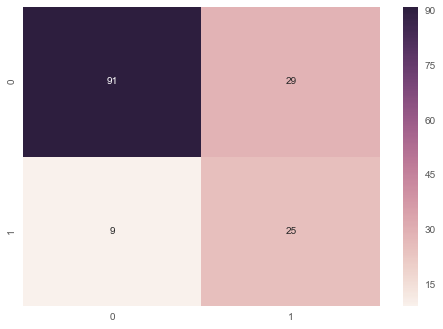

In [46]:
conf = confusion_matrix(predictions,Y_test)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()